# **MeTCaMPDatos**


**Edición 2021**

<img src="https://i.imgur.com/HnKHks1.png" height="150" />

## Aventurándonos en el mundo de los **datos**
En éste Notebook profundizaremos en los diferentes tipos de análisis que podemos realizar en un set de datos:
- Medidas de estadística descriptiva.
- Visualizaciones.
- Probabilidades.

## Objetivos
- Introducir funciones necesarias para una exploración inicial del dataset.
- Brindar nociones básicas de diferentes medidas de estadística descriptiva aplicadas.
- Pensar preguntas o problemas y definir las variables de interés.
- Descubrir un primer insight que aporte valor al análisis.


## Herramientas de trabajo 
En esta oportunidad vamos a utilizar el lenguaje de programación "Python" junto con la herramienta web "Google Colab" para realizar nuestro primer análisis de la encuesta de sueldos. Recorda que Colab es un servicio cloud basado en los Notebooks de Jupyter, por lo tanto no es necesario descargar nada. A su vez, nos iniciaremos en un primer uso de herramientas de software libre, es decir no necesitas una licencia para porder utilizarlas. 

<center>
<img src="https://i.imgur.com/Cq52LcH.png" height="150" />
</center>

## Explorando algunos datos
Vamos a trabajar con un set de datos obtenido de **SysArmy** que se denomina **"Encuesta de Sueldos"** y se puede consultar en: [este sitio](https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-sueldos-2020-2/).

<center>
<img src="https://i.imgur.com/ivxTHhG.png" height="150" />
</center>

Sysarmy es una organización internacional perteneciente a la comunidad de sistemas que nuclea a profesionales del área para favorecer el contacto y el intercambio de conocimiento de manera informal. Anualmente desarrollan una encuesta de sueldos con el objetivo de obtener información sobre la situación laboral actual en tecnología, evalúan el máximo nivel educativo alcanzado de los encuestados y brindan información sobre diferentes empresas. 

## ¿Que es "EDA"? 

En sus siglas en inglés hace referencia al **Análisis Exploratorio de Datos**. Este es el primer paso que debemos realizar como Data Scientists y consta de una primera revisión del estado de los datos y los consecuentes pasos necesarios para una correcta transformación.

La ciencia de datos es una disciplina que te permite convertir datos crudos en entendimiento, comprensión y conocimiento.

<center>
<img src="https://i.imgur.com/jclXnDS.png" height="150" />
</center>


En este sentido, el primer objetivo radica en preguntarnos **¿De qué se trata este dataset?**

## Importación de librerías

El concepto correcto en español es "biblioteca". Una biblioteca es básicamente un componente de software que nos brinda acceso a distintas funcionalidades.
Existen librerías con funciones para leer un archivo excel o csv y trabajar los datos como tablas (librería Pandas, por ejemplo), otras con funciones para graficar nuestros datos (como Seaborn), para trabajar con cálculo numérico (como Numpy).
Cualquiera sea el lenguaje con el que se decida programar, será útil conocer mediante la página oficial del lenguaje cuáles son las librerías disponibles, que nos facilitarán, en éste caso, el análisis de datos.

In [ ]:
#import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#sns.set_palette("vlag")

Hay muchas paletas de colores para elegir para los gráficos con Seaborn:
https://seaborn.pydata.org/tutorial/color_palettes.html

## Lectura del dataset

Vamos a trabajar con el dataset de encuesta de sueldos de Sysarmy, con las columnas renombradas (sin espacios, ni acentos, ni preguntas largas), que se realizó en el primer encuentro.
Éste archivo "renombrado" en formato csv, ya se encuentra en el repositorio GitHub de MET. 
No es necesario descargarlo, se puede "leer" en éste notebook directamente desde el link de GitHub.

Los datos que leamos desde el archivo en formato [csv](https://es.wikipedia.org/wiki/Valores_separados_por_comas), se guardarán en una variable llamada `df` que es un objeto del tipo `DataFrame`.

Un `DataFrame` es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png
" height="350" />
</center>


In [ ]:
url = 'https://raw.githubusercontent.com/MeT2021/MeTCamp-Data-Science/main/Encuentro2/Dataset/sysarmy_2020_renamed.csv'
df = pd.read_csv(url, index_col=0)
df[:3] # Es otra manera de ver las primeras filas, equivale a .head(3)

,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


**Miremos los datos**

- ¿Qué información tenemos en los datos?
- ¿Qué problema queremos resolver? ó ¿Cuál pregunta queremos responder? ¿Qué hipótesis podemos plantear?

En éste caso no contamos con un **diccionario de datos** o log de datos que nos describa el significado de cada columna. Cuando no son auto explicativas, es necesario interactuar con la fuente de los datos para confeccionar uno, ya que aporta el punto de partida de conocimiento de los datos y del problema a analizar.


**Veamos cuántas filas y columnas tienen nuestros datos**

Documentación de pandas [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

La función `.shape()`, nos devuelve una tupla, donde el primer número hace referencia a la cantidas de **filas** de nuestro conjunto de datos, y el segundo valor de la tupla hace referencia a la cantidad de **columnas**.

In [ ]:
df.shape

(6095, 49)

La función `.columns()`, nos devuelve un listado de los nombres de cada una de las columnas de **dataframe**. Saber el nombre de las columnas nos permitirá trabajar con los datos de las/s columna/s de nuestro interés, y aplicarle diferentes análisis para obtener conclusiones.


In [ ]:
df.columns

Index(['Unnamed: 0', 'perfil_genero', 'perfil_edad', 'trabajo_pais',
       'trabajo_provincia', 'perfil_anos_experiencia',
       'trabajo_anios_empresa_actual', 'trabajo_anios_puesto_actual',
       'trabajo_personas_a_cargo', 'perfil_nivel_estudios',
       'perfil_estado_estudios', 'perfil_carrera', 'perfil_universidad',
       'perfil_cursos_especializacion', 'perfil_contribuciones_open_source',
       'perfil_programa_como_hobbie', 'trabajo_rol', 'herramientas_plataforma',
       'herramientas_languagjs_programacion', 'herramientas_frameworks',
       'herramientas_data_bases', 'herramientas_qa_testing',
       'herramientas_IDEs', 'herramientas_sistema_operativo_pc',
       'herramientas_sistema_operativo_cel', 'trabajo_guardias ',
       'salario_guardias_pago', 'trabajo_guardias_tipo_pago ',
       'trabajo_tipo_contrato', 'salario_mensual_BRUTO',
       'salario_mensual_NETO', 'salario_salario_dolares',
       'salario_conformidad_sueldo',
       'salario_comparacion_sueldo_s

# Análisis de salarios

La primera pregunta que se nos ocurre al ver esta encuenta es: **"¿Cuánto cobran les programadores en Argentina?"**.

Este es un punto de partida para el análisis del conjunto de datos. El análisis exploratorio de datos es un proceso que generalmente requiere varias iteraciones de análisis: a medida que se obtengan conclusiones, se descubrirán otros aspectos relevantes de los datos, lo cual disparará nuevas preguntas.

## Elección de las variables de interés

Como punto inicial se debe elegir la o las variable de interés a analizar, en éste caso analizaremos los valores que toma la variable `'salario_mensual_NETO'`.

## Histograma de frecuencias

Una buena forma de comenzar una exploración es a través de la **visualización**. 
La librería [Seaborn](https://seaborn.pydata.org/) nos provee un tipo de gráfico específico para graficar columnas que contienen números, llamado `displot`. (No confundir con `distplot`, que está deprecado). 

El gráfico generado es un **histograma** de frecuencias. En el eje x se grafican los valores que toma la columna, divididos en intervalos o bins. En el eje y se grafica el conteo de ocurrencias de valores en cada intervalo.

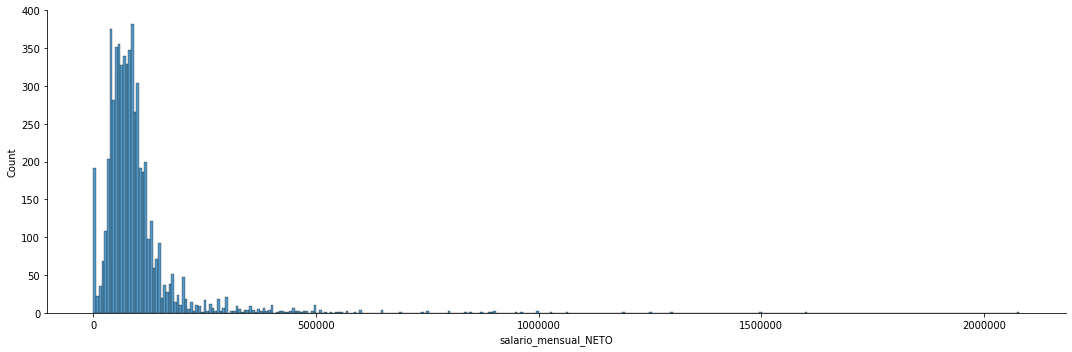

In [ ]:
sns.displot(df["salario_mensual_NETO"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

**¿Qué está pasando con ésta visualización?**

**¡Tip!** Antes de graficar, controlar el rango (ya que seaborn intentará crear miles de segmentos si el rango es muy grande) y remover los valores nulos (ya vamos a ver más sobre esto).


In [ ]:
print("Rango: ", df["salario_mensual_NETO"].min(), df["salario_mensual_NETO"].max())

Rango:  1.0 2080000.0


### Filtrando los valores de una columna del dataframe

Existen varias formas de filtrar los valores de una columna numérica del Dataframe, hoy utilizaremos estas dos:

```
df[df['salario_mensual_NETO']<= 50000]
```
o
```
df.query('salario_mensual_NETO <= 50000')
```



Vayamos al código:

In [ ]:
df[df['salario_mensual_NETO']<= 50000]
# Sólo se visualizan los datos donde el salario es menor o igual a $500000.
# No se ha modificado el dataset completo "df".

,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.000,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
5,Hombre,25,Argentina,Ciudad Autónoma de Buenos Aires,1.0,0.0,0.0,0,Terciario,Incompleto,Tecnicatura Superior en Programación,UTN - Universidad Tecnológica Nacional,No,No,Sí,Developer,Ninguna,"Java, Javascript","Node.js, React.js, Spark",MySQL,"Jest, JUnit, Postman","IntelliJ, Visual Studio Code",macOS,Android,No,0.0,Bruto,Full-Time,54000.0,44000.000,NaN,2,2,No,No recibo bono,Uno,15.0,5,Jamás,Heterosexual,NaN,No,10001+,Producto basado en Software,8,8,"Clases de gimnasia online, Clases de idiomas, ...",NaN
7,Hombre,23,Argentina,Provincia de Buenos Aires,0.0,0.0,0.0,0,Terciario,En curso,Tecnicatura en Programación,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular",No,Sí,Developer,IBM Cloud / Watson,"Java, Javascript","Spring, Liferay",MySQL,Ninguna,"Eclipse, IntelliJ, NetBeans, Notepad++",Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,45000.0,37500.000,NaN,2,2,No,No recibo bono,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Producto basado en Software,8,10,Ninguna de las anteriores,"Globant, Accenture, Making Sense, Globalogic"
9,Otros,35,Argentina,Ciudad Autónoma de Buenos Aires,20.0,5.0,5.0,0,Universitario,Incompleto,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Amazon Web Services, *BSD, Google Cloud Platfo...","Assembler, Bash/Shell, C, C#, Python, R","Flask, Torch, WordPress","MongoDB, MySQL, SQLite",Ninguna,"Coda, Eclipse, IPython / Jupyter, Nano, Notepa...",GNU/Linux,No tengo celular / no es Smartphone,No,0.0,Bruto,Full-Time,47000.0,39000.000,NaN,1,1,No,No recibo bono,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,10001+,Otras industrias,3,7,"Capacitaciones y/o cursos, Descuentos varios (...",NaN
10,Hombre,25,Argentina,Córdoba,1.0,0.0,0.0,0,Terciario,En curso,Analista de Sistemas,Instituto Terciario Interior de Córdoba,"Sí, de forma particular",Sí,Sí,Developer,"Docker, Linux","HTML, Javascript, Python","Bootstrap, Django, jQuery",PostgreSQL,Python Unittest,Visual Studio Code,GNU/Linux,Android,No,0.0,Porcentaje de mi sueldo,Freelance,36800.0,36800.000,NaN,3,4,No,No recibo bono,Uno,15.0,7,En un trabajo anterior,Heterosexual,NaN,No,1-10,Producto basado en Software,8,7,"Horarios fle

In [ ]:
df.query('salario_mensual_NETO <= 50000')

,Unnamed: 0,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.000,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
5,5,Hombre,25,Argentina,Ciudad Autónoma de Buenos Aires,1.0,0.0,0.0,0,Terciario,Incompleto,Tecnicatura Superior en Programación,UTN - Universidad Tecnológica Nacional,No,No,Sí,Developer,Ninguna,"Java, Javascript","Node.js, React.js, Spark",MySQL,"Jest, JUnit, Postman","IntelliJ, Visual Studio Code",macOS,Android,No,0.0,Bruto,Full-Time,54000.0,44000.000,NaN,2,2,No,No recibo bono,Uno,15.0,5,Jamás,Heterosexual,NaN,No,10001+,Producto basado en Software,8,8,"Clases de gimnasia online, Clases de idiomas, ...",NaN
7,7,Hombre,23,Argentina,Provincia de Buenos Aires,0.0,0.0,0.0,0,Terciario,En curso,Tecnicatura en Programación,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular",No,Sí,Developer,IBM Cloud / Watson,"Java, Javascript","Spring, Liferay",MySQL,Ninguna,"Eclipse, IntelliJ, NetBeans, Notepad++",Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,45000.0,37500.000,NaN,2,2,No,No recibo bono,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Producto basado en Software,8,10,Ninguna de las anteriores,"Globant, Accenture, Making Sense, Globalogic"
9,9,Otros,35,Argentina,Ciudad Autónoma de Buenos Aires,20.0,5.0,5.0,0,Universitario,Incompleto,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Amazon Web Services, *BSD, Google Cloud Platfo...","Assembler, Bash/Shell, C, C#, Python, R","Flask, Torch, WordPress","MongoDB, MySQL, SQLite",Ninguna,"Coda, Eclipse, IPython / Jupyter, Nano, Notepa...",GNU/Linux,No tengo celular / no es Smartphone,No,0.0,Bruto,Full-Time,47000.0,39000.000,NaN,1,1,No,No recibo bono,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,10001+,Otras industrias,3,7,"Capacitaciones y/o cursos, Descuentos varios (...",NaN
10,10,Hombre,25,Argentina,Córdoba,1.0,0.0,0.0,0,Terciario,En curso,Analista de Sistemas,Instituto Terciario Interior de Córdoba,"Sí, de forma particular",Sí,Sí,Developer,"Docker, Linux","HTML, Javascript, Python","Bootstrap, Django, jQuery",PostgreSQL,Python Unittest,Visual Studio Code,GNU/Linux,Android,No,0.0,Porcentaje de mi sueldo,Freelance,36800.0,36800.000,NaN,3,4,No,No recibo bono,Uno,15.0,7,En un trabajo anterior,Heterosexual,NaN,No,1-10,Producto basado en Soft

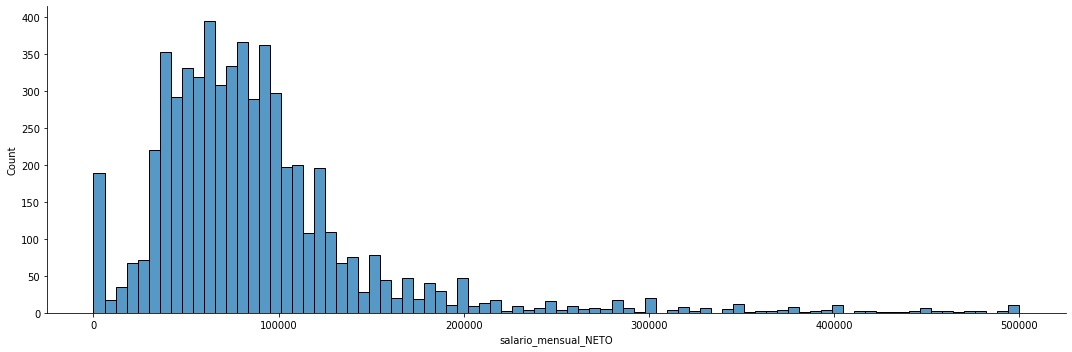

In [ ]:
# Volvemos a graficar limitando los valores de la columna 'salary_monthly_NETO'
sns.displot(df[df["salario_mensual_NETO"]<=500000]["salario_mensual_NETO"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

Podemos ver que los "valores extremos" u "outliers", tiene impacto también en las visualizaciones y por ello es necesario analizar éstos casos extremos y darle un tratamiento adecuado al problema en análisis. Veremos esto en mayor profundidad más adelante.

### ¿Qué estamos viendo?

Las visualizaciones simples son prácticas para conocer la forma de los datos rápidamente, porque condensan mucha información. Por ejemplo:
* El rango de valores tomados por la columna va desde 0 hasta aproximadamente 2M.
* La mayoría de los valores se concentra por debajo de los 250K, y pocos superan los 500K.
* Los valores más frencuentes aparentan estar cerca de los 100K.
* Hay un pico de ocurrencias cercano al valor 0, que brinda poco detalle.

Este histograma refleja la cantidad de personas para cada salario Neto, **¿cómo podemos explicar el pico cercano al salario cero?**

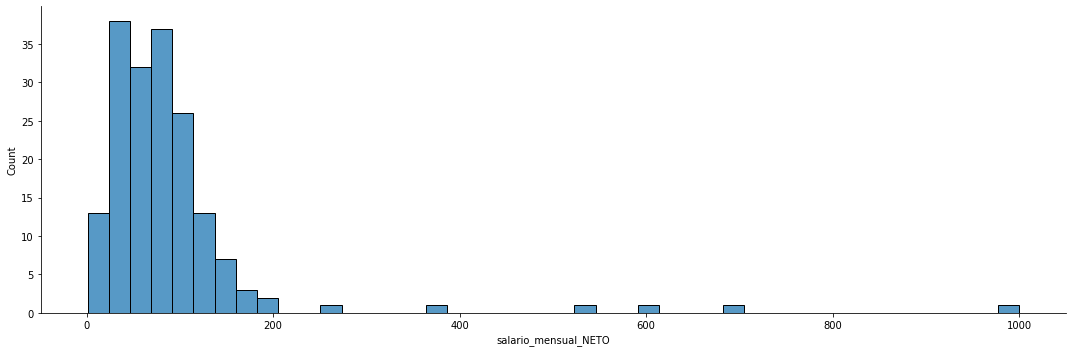

In [ ]:
# Graficamos el histograma de los salarios menores o iguales a $1000
sns.displot(df[df["salario_mensual_NETO"]<=1000]["salario_mensual_NETO"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

Podemos observar que el pico cercano al valor cero en el histograma sin filtrar, se debe a valores de sueldos que se han ingresado entre \$0 y \$200, lo cual puede haberse ingresado erróneamente, o a propósito si no quisieron contestar cuál es su sueldo.

## Ejercicio 1


a) Realizar un histograma que muestre la cantidad de personas de acuerdo a la variable `perfil_edad`.

**¡Tip!** Antes de graficar, controlar el rango (ya que seaborn intentará crear miles de segmentos si el rango es muy grande). Usar las funciones `.min()` y `.max()`. De ser necesario filtrar el conjunto de datos para graficar sólo valores menores a cierta edad.

b) ¿La variable edad tiene valores extremos?


In [ ]:
# Responder acá. Cálculo del rango.
print("Rango: ", df["perfil_edad"].min(), df["perfil_edad"].max())
# Vemos que la variable edad tiene valores extremos, como el '52000'

Rango:  18 52000


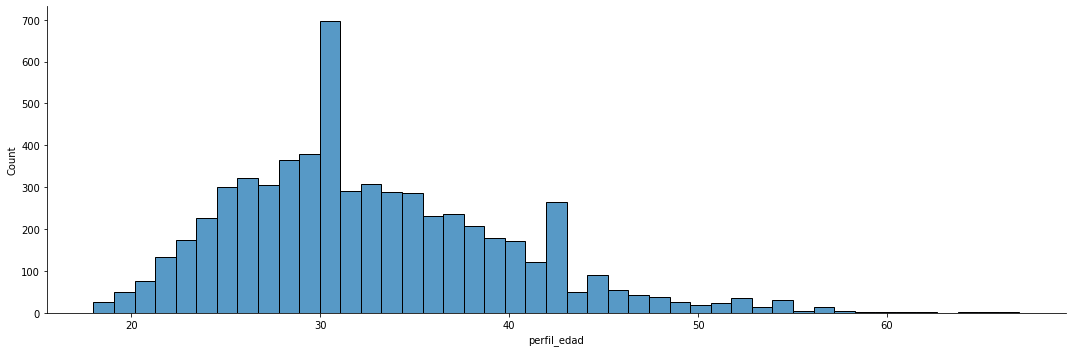

In [ ]:
# Responder acá. Gráfico del histograma de frecuencias.
sns.displot(df[df["perfil_edad"]<99]["perfil_edad"] , aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

## Funciones `.describe()`, `.info()` y `.value_counts()`

Para visualizar algunos **estadísticos**, podemos utilizar la función `.describe()` sobre una columna en particular. En éste caso para una columna numérica.

In [ ]:
df["salario_mensual_NETO"].describe().round(3)

count       5883.000
mean       94907.949
std        96862.258
min            1.000
25%        51480.000
50%        78000.000
75%       106000.000
max      2080000.000
Name: salario_mensual_NETO, dtype: float64

También puede utilizarse `.describe()` sobre todo el conjunto de datos:

In [ ]:
df.describe().round(3)

,perfil_edad,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,salario_guardias_pago,salario_mensual_BRUTO,salario_mensual_NETO,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion
count,6095.000,6095.000,6095.000,6095.000,6095.000,6095.000,6095.000,5883.000,6095.000,6095.000,6095.000,6095.000,6095.000,6095.000
mean,41.182,8.931,3.312,2.890,2.212,664.042,124058.550,94907.949,2.620,2.364,10.445,2.786,7.340,7.621
std,665.721,7.161,4.368,3.423,32.983,10540.523,122912.352,96862.258,0.859,0.946,12.860,2.837,2.024,2.324
min,18.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000
25%,27.000,3.000,0.000,1.000,0.000,0.000,61595.000,51480.000,2.000,2.000,0.000,0.000,6.000,6.000
50%,31.000,7.000,2.000,2.000,0.000,0.000,96000.000,78000.000,3.000,2.000,7.000,2.000,8.000,8.000
75%,37.000,13.000,4.000,4.000,0.000,0.000,145000.000,106000.000,3.000,3.000,18.000,6.000,9.000,10.000
max,52000.000,115.000,43.000,34.000,2500.000,650000.000,2180000.000,2080000.000,4.000,4.000,100.000,8.000,10.000,10.000


Sólo se muestran estadísticos de variables numéricas. Veamos qué sucede si hacemos `.describe()` de una variable categórica.

¿Cómo sabemos cuaĺes son categóricas? La función `.info()` nos permite visualizar como tipo `'object'` todas las columnas no numéricas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6095 entries, 0 to 6094
Data columns (total 48 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   perfil_genero                                  6095 non-null   object 
 1   perfil_edad                                    6095 non-null   int64  
 2   trabajo_pais                                   6095 non-null   object 
 3   trabajo_provincia                              6095 non-null   object 
 4   perfil_anos_experiencia                        6095 non-null   float64
 5   trabajo_anios_empresa_actual                   6095 non-null   float64
 6   trabajo_anios_puesto_actual                    6095 non-null   float64
 7   trabajo_personas_a_cargo                       6095 non-null   int64  
 8   perfil_nivel_estudios                          6095 non-null   object 
 9   perfil_estado_estudios                         6095 

Elegimos por ejemplo la columna `'perfil_genero'`.

In [ ]:
df['perfil_genero'].describe()

count       6095
unique         3
top       Hombre
freq        5122
Name: perfil_genero, dtype: object

Con la función `.value_counts()` podemos ver para cada categoría cuántos registros (filas/respuestas) hay.

In [ ]:
df['perfil_genero'].value_counts()

Hombre    5122
Mujer      942
Otros       31
Name: perfil_genero, dtype: int64

**Observación:** Hay preguntas nos podemos hacer en el análisis de datos que no se responden con un histograma. Veremos otras herramientas y tipos de gráficos que nos ayudarán a profundizar el análisis.

Para continuar el análisis, es necesario aplicar herramientas teóricas que nos brinda la Estadística y la Probabilidad.

## Variables aleatorias y sus tipos

En base a la definición de variable aleatoria visto en la teoría, se puede hablar de que cada columna de nuestro dataset es un **variable aleatoria**, y que el valor de esa variable obtenido de cada respuesta es una **realización** de dicha variable. Pero, ¿qué tipo tienen esas variables?

![picture](http://segasi.com.mx/clases/cide/recursos/tipo_variables_11.png)

### Variables Aleatorias Numéricas

El salario, la edad, los años de experiencia, son variables aleatorias cuyo rango es un conjunto numérico. Podemos clasificarlas en **continuas** o **discretas**, aunque esa distinción se vuelve difusa cuando trabajamos con datos computacionalmente. ¿Por qué?

* Datos que en teoría son continuos, se miden de manera discreta. Por ejemplo, los *años* de experiencia, la altura de una persona en *centímetros*.
* Datos que en teoría son continuos, se discretizan a fines prácticos. Por ejemplo, la edad, el salario en pesos argentinos.

Para analizar datos continuos se usan frecuentemente los **histogramas**, como en el caso anterior de los sueldos.

### Variables Aleatorias Categóricas

Las variables categóricas toman valores de un conjunto pre-definido, usualmente pero no necesariamente finito. Para visualizarlas, puede usarse un gráfico de barras, que representa cada valor observado con una columna, y el conteo de ese valor con la altura de la columna.

In [ ]:
df["perfil_genero"].unique()

array(['Mujer', 'Hombre', 'Otros'], dtype=object)

In [ ]:
df["perfil_genero"].nunique()

3

In [ ]:
df["perfil_genero"].value_counts()

Hombre    5122
Mujer      942
Otros       31
Name: perfil_genero, dtype: int64

**Diagrama de barras**

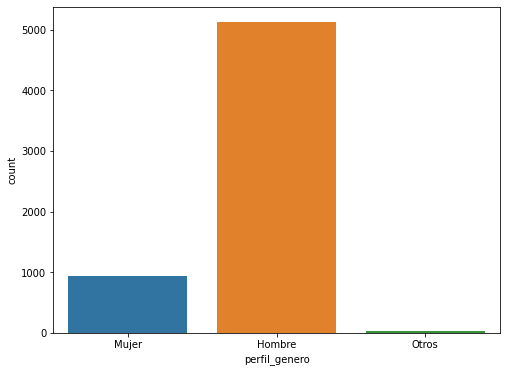

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["perfil_genero"])

## Ejercicio 2

Realice un diagrama de barras, para la variable categórica: `'trabajo_provincia'`.

In [ ]:
# Responder acá - value_counts()
df['trabajo_provincia'].value_counts()

Ciudad Autónoma de Buenos Aires    3764
GBA                                 524
Provincia de Buenos Aires           497
Córdoba                             456
Santa Fe                            354
Mendoza                             107
Entre Ríos                           66
Río Negro                            38
Neuquén                              36
Jujuy                                36
Tucumán                              33
Misiones                             26
Chaco                                24
Chubut                               23
Corrientes                           19
Salta                                14
San Luis                             14
La Rioja                             14
Tierra del Fuego                     11
Santiago del Estero                  10
La Pampa                              9
San Juan                              7
Santa Cruz                            6
Formosa                               4
Catamarca                             3


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

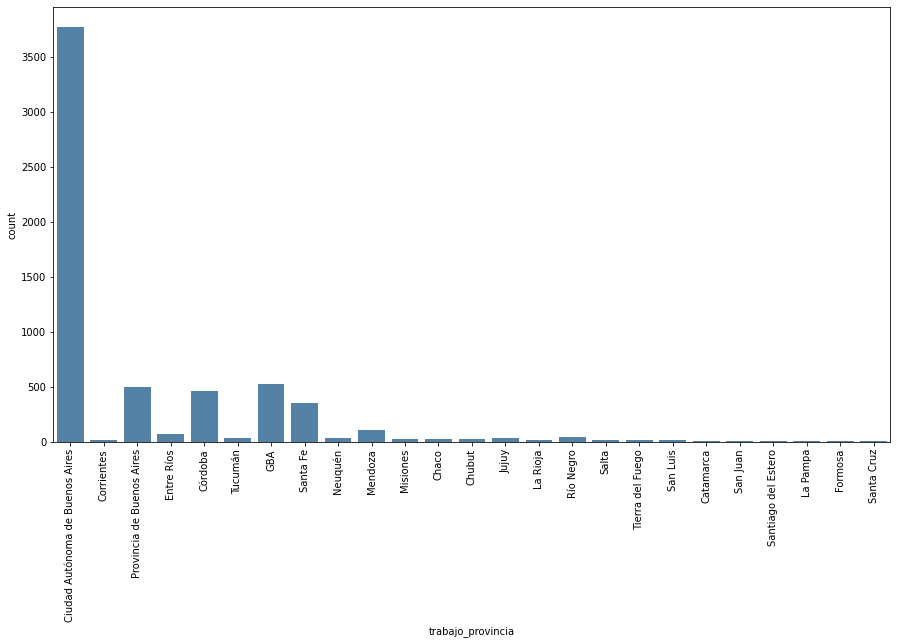

In [ ]:
# Responder acá - Histograma
plt.figure(figsize=(15,8))
sns.countplot(x=df["trabajo_provincia"], color='steelblue')
plt.xticks(rotation=90)

### Variables Aleatorias Categóricas Ordinales

Las variables categóricas pueden ser **ordinales**, si existe un orden lógico entre sus valores. Esto es independiente de que sean numéricas. En caso de que un orden exista, es adecuado incluirlo en el gráfico.

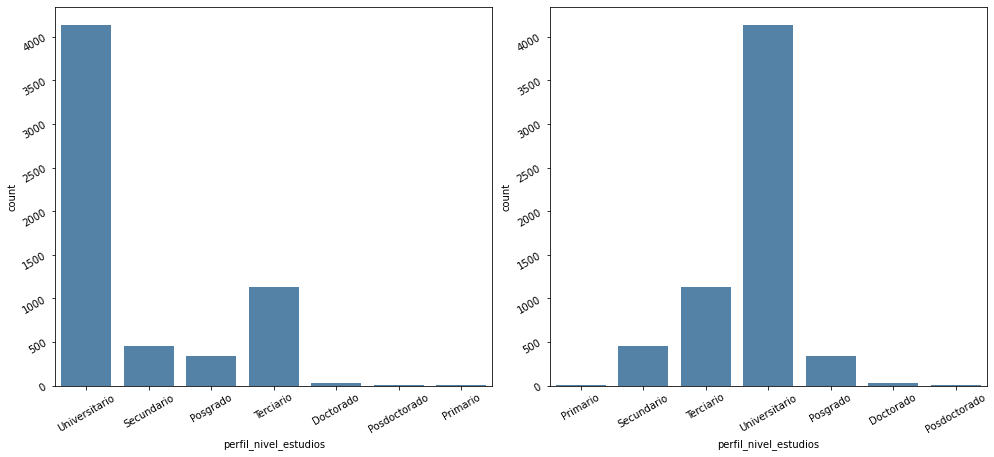

In [ ]:
nivel_estudio_orden = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig, axes = plt.subplots(ncols=2, figsize=(14,6))
g = sns.countplot(x=df["perfil_nivel_estudios"], color='steelblue', ax=axes[0])
g = sns.countplot(x=df["perfil_nivel_estudios"], color='steelblue', ax=axes[1],
                  order=nivel_estudio_orden)
fig.tight_layout(h_pad=4)
for ax in axes:
  ax.tick_params(labelrotation=30)

### Tipos de variables vs tipos de datos

Tenemos que distinguir dos conceptos con el mismo nombre y significado similar, pero que no son iguales:
 - **tipo de la variable aleatoria** es el tipo de valores con los que decidimos *intepretar* las realizaciones.
 - **tipo de datos** es un concepto de programación que indica en qué formato se representa la información. Cuando asignamos a una variable `age` *del programa de Python* una realización de una variable aleatoria conceptual `profile_age`, esa variable `age` también tiene un *tipo de Python*, por ejemplo `int` o `float`.

Se puede acceder a los tipos de datos del DataFrame. El tipo `object` se utiliza para representar cualquier variable que no sea numérica, como por ejemplo los `str`.

In [ ]:
df.dtypes[:10]

perfil_genero                    object
perfil_edad                       int64
trabajo_pais                     object
trabajo_provincia                object
perfil_anos_experiencia         float64
trabajo_anios_empresa_actual    float64
trabajo_anios_puesto_actual     float64
trabajo_personas_a_cargo          int64
perfil_nivel_estudios            object
perfil_estado_estudios           object
dtype: object

# Estadística descriptiva

Hemos estado organizando y visualizando los datos de distintas maneras, pero ¿qué intuiciones podemos obtener?

Las visualizaciones como histogramas o gráficos de conteo muestran la cantidad de veces que se observa cada valor en un conjunto de realizaciones de una variable aleatoria. Esto se denomina análisis de frecuencia, y es parte de la **estadística descriptiva**.

El uso de visualizaciones nos limita a estimaciones, pero los datos crudos son demasiado como para intepretarlos en conjunto. Para eso, la estadística descriptiva provee también medidas de tendencia central y de dispersión, que resumen en un valor numérico propiedades de las realizaciones de la variable.

Retomemos el problema original con la v.a. `salario_mensual_NETO`, ¿qué información brindan las siguientes métricas y cómo usarlas?

In [ ]:
df["salario_mensual_NETO"].describe().round(3)

count       5883.000
mean       94907.949
std        96862.258
min            1.000
25%        51480.000
50%        78000.000
75%       106000.000
max      2080000.000
Name: salario_mensual_NETO, dtype: float64

## Medidas de tendencia central

Cuando se quiere obtener un valor representativo de todas las realizaciones de una v.a., o su centro, se utiliza una *medida de tendencia central*.

Repasando, dada X una v.a y un conjunto de realizaciones $x = \{ x_1, x_2 ... \}$ donde $x_i = X(\omega)$ para algún $\omega \in \Omega$, y $N = |x|$:

* La **media muestral** (aritmética) o promedio se calcula como:

$$ \bar{x} = \frac{1}{N} \sum_i^N x_i $$

* La **mediana** se calcula:
  1. Ordenar las realizaciones tal que $x_j \leq x_{j+1}$ 
  2. Si la cantidad de datos $N$ es impar, la mediana es el valor central: $median = x_{\lfloor N / 2 \rfloor +1}$
  3. Si la cantidad de datos $N$ es par, la mediana es e promedio de los dos valores centrales: $median = \frac{1}{2} (x_{ N / 2 } + x_{ (N / 2) +1})$

* La **moda** son los valores con mayor frecuencia, es decir, los que más se repite.


In [ ]:
df["salario_mensual_NETO"].mean(), df["salario_mensual_NETO"].median()

(94907.9491018188, 78000.0)

**¿Por qué las dos medidas son tan distintas?**

Propiedades de la media:
* Se puede interpretar como el *centro de masa* del histograma. Es decir, si el histograma fuera una figura de madera, el punto de equilibrio donde podemos apoyarlo y no se cae es la media.
* Es muy sensible a valores extremos.

In [ ]:
# Calculamos la media de salario Neto con el set de datos filtrado a sueldos menores o iguales a $300mil
df[df["salario_mensual_NETO"]<=300000]["salario_mensual_NETO"].mean()

82794.99782660375

## Medidas de dispersión

Las **medidas de dispersión** entregan información sobre la variación de la variable. Pretenden resumir en un solo valor la dispersión que tiene un conjunto de datos. Las medidas de dispersión más utilizadas son: Rango de variación, Varianza, Desviación estándar, Coeficiente de variación.

Por ejemplo, comparemos el salario neto con el salario bruto. A priori, **¿deberíamos ver alguna diferencia?**

In [ ]:
df[['salary_monthly_NETO', 'salary_monthly_BRUTO']].describe().round()

,salary_monthly_NETO,salary_monthly_BRUTO
count,5883.0,6095.0
mean,94908.0,124059.0
std,96862.0,122912.0
min,1.0,1.0
25%,51480.0,61595.0
50%,78000.0,96000.0
75%,106000.0,145000.0
max,2080000.0,2180000.0


Claramente, ambas distribuciones están centradas en valores distintos, pero ¿podemos decir algo sobre su dispersión?

Como estamos hablando de dos v.a. distintas, no podemos comparar directamente los valores de las desviaciones estándar, sino que tenemos que usar el coeficiente de variación.

In [ ]:
import scipy

print("Coeficiente de variación salario bruto",
      scipy.stats.variation(df.salary_monthly_BRUTO))
print("Coeficiente de variación salario neto",
      scipy.stats.variation(df.salary_monthly_NETO.dropna())) #Sin los nulos

Coeficiente de variación salario bruto 0.9906795521353624
Coeficiente de variación salario neto 1.0205048799041485


## Percentiles y gráficos de caja o 'boxplot'

Los gráficos de caja son otra forma de representar la distribución de las realizaciones de una v.a. numérica, de una forma más condensada que un histograma.

Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos es que *no todo el mundo recuerda cómo leerlos*.

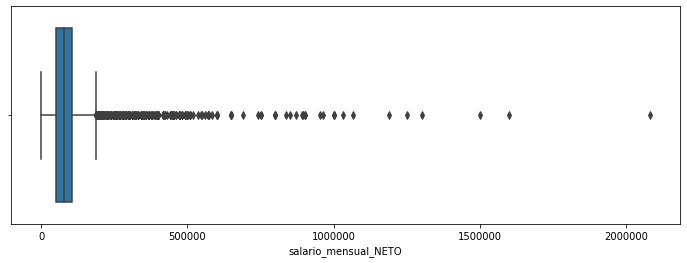

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df["salario_mensual_NETO"])
plt.ticklabel_format(style='plain', axis='x')
#sns.despine()

Veamos la variable `'perfil_edad'`:

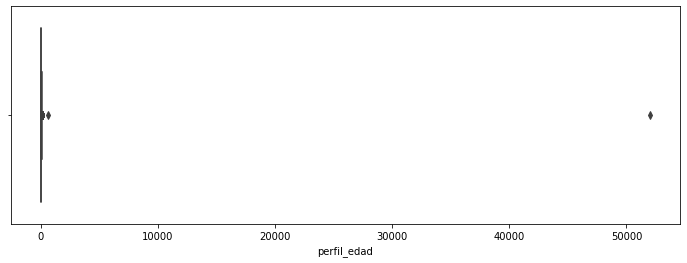

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df["perfil_edad"])

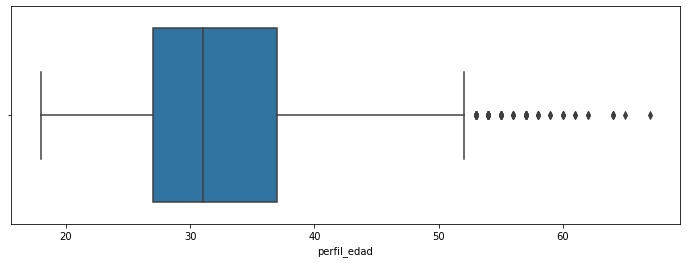

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df[df["perfil_edad"] < 100]["perfil_edad"])

Otro ejemplo, podemos comparar la distribución de los salarios netos con respecto al nivel de estudios alcanzado.

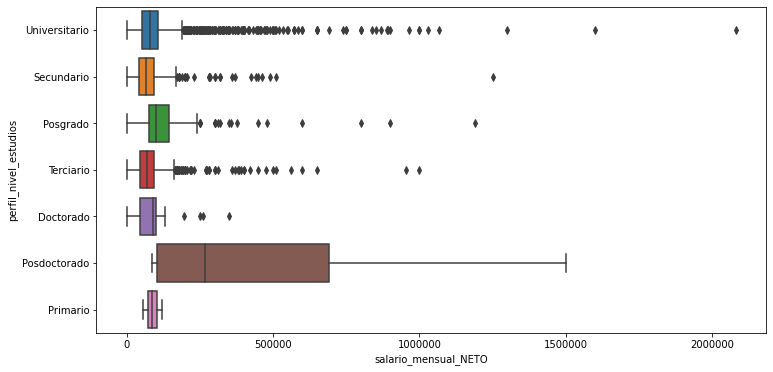

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="salario_mensual_NETO", y='perfil_nivel_estudios')
plt.ticklabel_format(style='plain', axis='x')

**¿Qué puede estar causando una diferencia tan grande en la distribución para las respuestas que dicen Posdoctorado?**

In [ ]:
df['perfil_nivel_estudios'].value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: profile_studies_level, dtype: int64

In [ ]:
df[df['perfil_nivel_estudios']=='Posdoctorado']["salario_mensual_NETO"]

318      422500.0
1918     110000.0
2797      87000.0
2895    1500000.0
Name: salario_mensual_NETO, dtype: float64

## Eliminación de valores extremos

### Usando percentiles 

Una forma conservadora de eliminar valores extremos que estén afectando a la media, el rango y las visualizaciones es seleccionar un cierto porcentaje más extremo. Para eso, usamos los percentiles.

Por ejemplo, podemos elegir quedarnos con el 99% de salarios más bajos, eliminando el 1%. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [ ]:
k = 90
percentile_90 = df[salary_col].quantile(k / 100)
n_below = len(df[df[salary_col] < percentile_90])
n_above = len(df[df[salary_col] > percentile_90])
print('Percentil {} de la columna {}: {}'.format(k, salary_col, percentile_90))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

Percentil 90 de la columna salary_monthly_NETO: 150000.0
% de datos menor que percentil 90: 0.8592288761279737
% de datos mayor que percentil 90: 0.09532403609515996


Ésto se lee como "el 90% de las muestras cobran por debajo de 150k."

In [ ]:
#Se pueden ver varios percentiles para ver en qué valores los datos "pegan un salto" en sus valores
df[salary_col].quantile([.95, .98, .99, .995, .998])

0.950    210000.00
0.980    370000.00
0.990    491800.00
0.995    650000.00
0.998    955289.52
Name: salary_monthly_NETO, dtype: float64

El percentil a legir para eliminar registros por encima de ese valor, es una decisión que se debe tomar a conciencia, siempre con conocimiento de dominio, y cuantificando cuántos datos se pierden, qué porcentaje representan del total, y si con esta limpieza no estamos perdiendo representatividad de alguna clase que queremos conservar (por ejemplo que desaparezcan todos los casos de 'Posdoctorado'.)

También es útil ver los valores extremos en el límite inferior de los datos.

In [ ]:
# Veamos valores extremos cercanos al cero.
df[salary_col].quantile([.01, .025, .05, .09, .1, .25, .5, .75]) 

0.010        53.46
0.025       115.35
0.050     22500.00
0.090     34000.00
0.100     35000.00
0.250     51480.00
0.500     78000.00
0.750    106000.00
Name: salary_monthly_NETO, dtype: float64

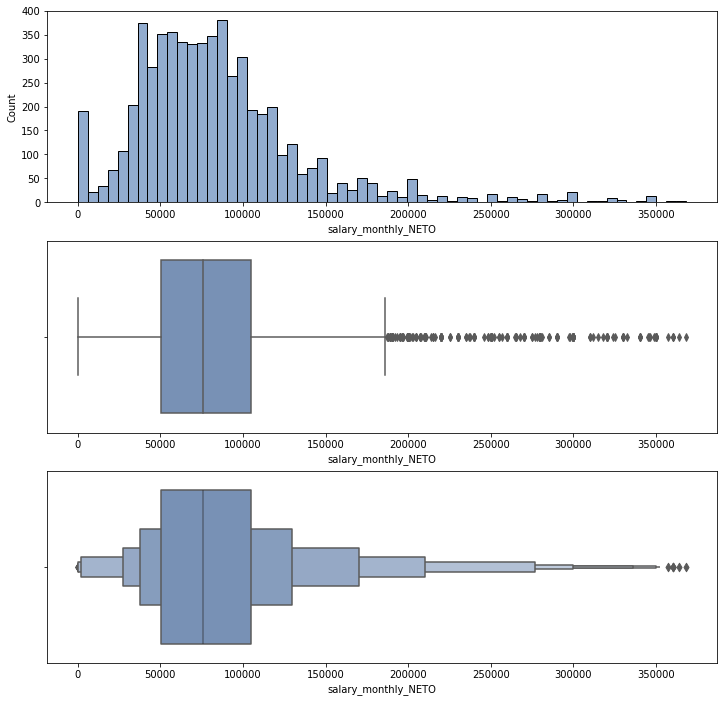

In [ ]:
# Por ejemplo si quertemos eliminar los valore spor encima del percentil 98
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = df[salary_col].quantile(.98)
data = df[df[salary_col] < max_limit][salary_col]
sns.histplot(x=data, ax=axes[0])
sns.boxplot(x=data, ax=axes[1])
sns.boxenplot(x=data, ax=axes[2])

### Rango itercuartílico vs desviación stándard

In [ ]:
def clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

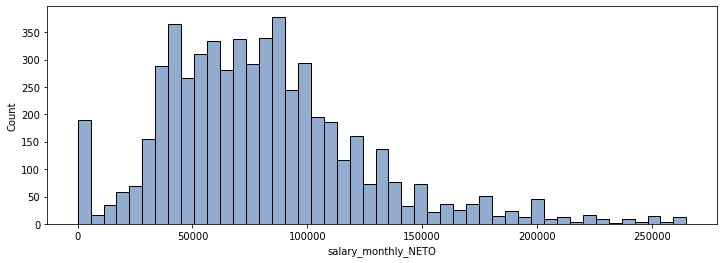

In [ ]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_q3(df, salary_col)[salary_col]
sns.histplot(x=data)

In [ ]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

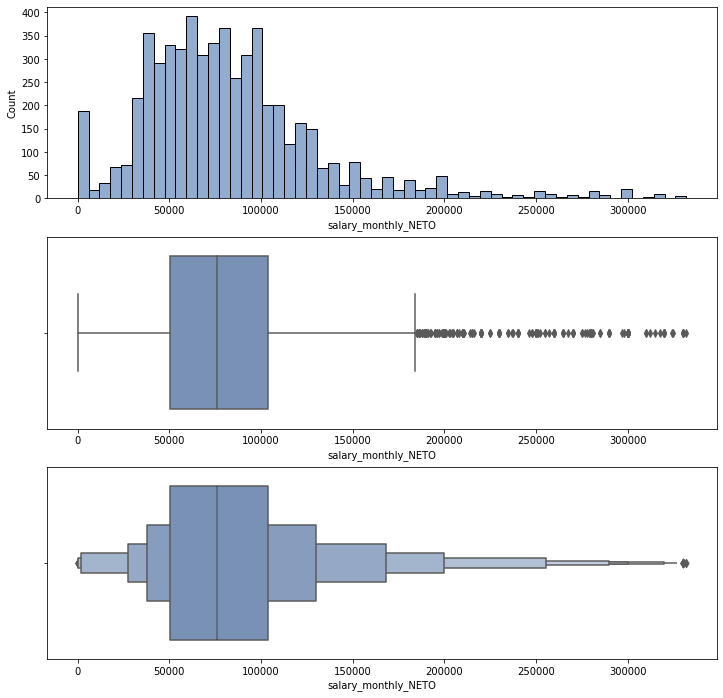

In [ ]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
data = clean_outliers_sd(df, salary_col)[salary_col]
sns.histplot(x=data, ax=axes[0])
sns.boxplot(x=data, ax=axes[1])
sns.boxenplot(x=data, ax=axes[2])

**Ejercicio de manejo de Outliers en la variable de sueldo neto**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

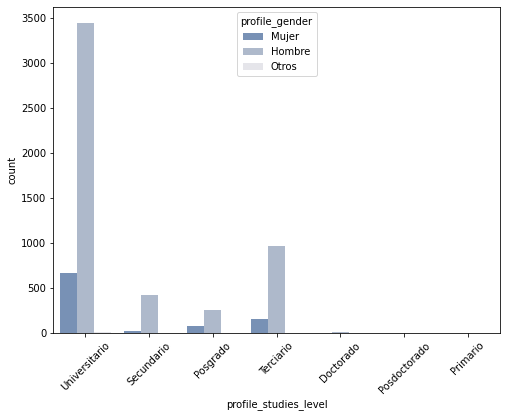

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.countplot(df.profile_studies_level, hue=df.profile_gender) 
plt.xticks(rotation=45)

In [ ]:
## Tabla de contingencia
pd.crosstab(df.profile_gender, df.profile_studies_level)#, normalize=True)

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,19,4,256,2,424,970,3447
Mujer,8,0,85,0,24,158,667
Otros,3,0,1,0,1,7,19


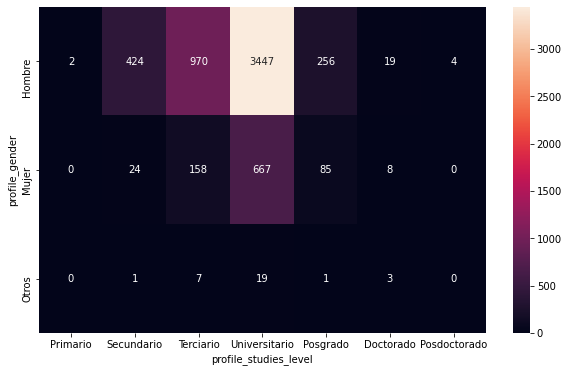

In [ ]:
fig = plt.figure(figsize=(10,6))
exp = pd.crosstab(df.profile_gender,
                  df.profile_studies_level)[sorted_studies_levels]
sns.heatmap(exp, annot=True, fmt='g')

Para ver más visualizaciones posibles y cuándo usarlas, pueden visitar [este enlace](https://www.data-to-viz.com/).

# Feature engineering

## Valores faltantes


In [ ]:
df.isnull().sum()

perfil_genero                                       0
perfil_edad                                         0
trabajo_pais                                        0
trabajo_provincia                                   0
perfil_anos_experiencia                             0
trabajo_anios_empresa_actual                        0
trabajo_anios_puesto_actual                         0
trabajo_personas_a_cargo                            0
perfil_nivel_estudios                               0
perfil_estado_estudios                              0
perfil_carrera                                    299
perfil_universidad                                534
perfil_cursos_especializacion                       0
perfil_contribuciones_open_source                   0
perfil_programa_como_hobbie                         0
trabajo_rol                                         0
herramientas_plataforma                             2
herramientas_languagjs_programacion                 1
herramientas_frameworks     

- Agregar métodos de imputación de valores faltantes: media, moda, mediana, constante. KNN.
- Variable categóricas: dummy? binarias?
- Transformaciones extras: normalizar, escalar, estandarizar.
